안녕하세요, 자연어 처리 강의를 시작하겠습니다. 오늘 우리는 딥러닝을 활용한 자연어 처리의 기초를 다지고, 주어진 코드를 통해 그 원리와 배경 지식을 함께 살펴보겠습니다.

텍스트 데이터를 기계가 이해할 수 있는 형태로 변환하고, 이를 바탕으로 감성 분석과 같은 실제적인 문제를 해결하는 과정을 단계별로 학습할 것입니다. 각 코드 예제와 함께 상세한 설명을 덧붙여, 여러분이 자연어 처리의 핵심 개념들을 명확히 이해할 수 있도록 돕겠습니다.

다음은 오늘 다룰 내용을 포함하여 수정한 강의 자료입니다.

# 21장 딥러닝을 이용한 자연어 처리

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning_4th/blob/master/colab/ch21-colab.ipynb)

## 서론: 딥러닝과 자연어 처리

자연어 처리(Natural Language Processing, NLP)는 인간이 사용하는 자연스러운 언어(자연어)를 컴퓨터가 이해하고, 분석하고, 생성할 수 있도록 하는 인공지능의 한 분야입니다. 이메일 필터링, 기계 번역, 챗봇, 감성 분석 등 우리 생활 깊숙이 자리 잡은 많은 기술들이 NLP를 기반으로 하고 있습니다.

최근 몇 년간 딥러닝 기술이 발전하면서 NLP 분야에서도 혁신적인 성과들이 나타나고 있습니다. 딥러닝 모델은 대량의 텍스트 데이터로부터 복잡한 패턴과 의미를 스스로 학습하여, 기존의 방식보다 훨씬 높은 성능을 보여주고 있습니다.

이 장에서는 케라스(Keras)를 활용하여 텍스트 데이터를 딥러닝 모델에 입력하기 위한 전처리 과정부터, 간단한 딥러닝 모델을 구축하여 텍스트를 분류하는 방법까지 단계별로 학습합니다.

## 1. 텍스트의 토큰화

**토큰화(Tokenization)란 무엇일까요?**

컴퓨터는 텍스트를 그대로 이해하지 못합니다. 텍스트를 딥러닝 모델의 입력으로 사용하기 위해서는 먼저 컴퓨터가 처리할 수 있는 숫자 형태로 변환해야 합니다. 그 첫 번째 단계가 바로 **토큰화(Tokenization)**입니다.

토큰화는 텍스트를 의미 있는 가장 작은 단위인 **토큰(token)**으로 분리하는 과정을 말합니다. 여기서 '의미 있는 단위'란 문맥에 따라 단어, 문자, 혹은 문장일 수도 있습니다. 예를 들어, "오늘 날씨가 매우 좋다"라는 문장이 있다면, 이를 ["오늘", "날씨가", "매우", "좋다"]와 같이 단어 단위로 쪼개는 것이 일반적인 토큰화 방식입니다.



![Hello World](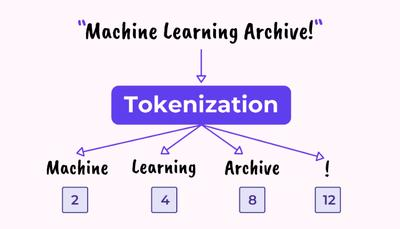
)

**왜 토큰화가 필요할까요?**

*   **분석의 기본 단위**: 토큰은 텍스트 분석의 기본 단위가 됩니다. 단어 빈도 계산, 중요 단어 식별 등 다양한 분석 작업이 토큰을 기반으로 이루어집니다.
*   **수치화의 준비 단계**: 토큰화된 각 단어(토큰)는 이후 단계에서 고유한 숫자(인덱스)로 변환되거나 벡터로 표현되어 모델의 입력으로 사용됩니다.



아래 코드는 케라스 라이브러리를 이용해 간단한 토큰화를 수행하는 예제입니다.



In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.utils import to_categorical
from numpy import array

# 케라스의 텍스트 전처리와 관련한 함수중 text_to_word_sequence 함수를 불러옵니다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence
 
# 전처리할 텍스트를 정합니다.
text = '해보지 않으면 해낼 수 없다'
 
# 해당 텍스트를 토큰화합니다.
result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n토큰화:\n", result)


원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']


**출력 결과:**

```

원문:
 해보지 않으면 해낼 수 없다

토큰화:
 ['해보지', '않으면', '해낼', '수', '없다']

```

위 예제에서 `text_to_word_sequence` 함수는 주어진 텍스트를 공백과 구두점을 기준으로 단어 단위로 분리하고, 모든 단어를 소문자로 변환하여 리스트 형태로 반환합니다. 이는 가장 기본적인 형태의 토큰화 방법입니다.

**단어 빈도수 세기 및 단어 집합(Vocabulary) 생성**

실제 자연어 처리에서는 단순히 텍스트를 나누는 것 이상으로, 각 단어가 얼마나 자주 등장하는지(단어 빈도), 전체 문서에서 어떤 단어들이 사용되었는지(단어 집합 또는 어휘사전, Vocabulary) 등을 파악하는 것이 중요합니다. 케라스의 `Tokenizer` 클래스는 이러한 작업을 편리하게 수행하도록 도와줍니다.

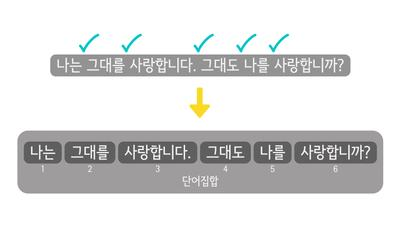

In [24]:
# 단어 빈도수 세기

# 전처리하려는 세 개의 문장을 정합니다.
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
       '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.',
       ]
 
# 토큰화 함수를 이용해 전처리 하는 과정입니다.
token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용
 
# 단어의 빈도수를 계산한 결과를 각 옵션에 맞추어 출력합니다.
# Tokenizer()의 word_counts 함수는 순서를 기억하는 OrderedDict 클래스를 사용합니다.
print("\n단어 카운트:\n", token.word_counts) 

# 출력되는 순서는 랜덤입니다. 
print("\n문장 카운트: ", token.document_count)
print("\n각 단어가 몇 개의 문장에 포함되어 있는가:\n", token.word_docs)
print("\n각 단어에 매겨진 인덱스 값:\n",  token.word_index)


단어 카운트:
 OrderedDict({'먼저': 1, '텍스트의': 2, '각': 1, '단어를': 1, '나누어': 1, '토큰화': 1, '합니다': 1, '단어로': 1, '토큰화해야': 1, '딥러닝에서': 2, '인식됩니다': 1, '토큰화한': 1, '결과는': 1, '사용할': 1, '수': 1, '있습니다': 1})

문장 카운트:  3

각 단어가 몇 개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'먼저': 1, '나누어': 1, '합니다': 1, '단어를': 1, '각': 1, '토큰화': 1, '텍스트의': 2, '딥러닝에서': 2, '토큰화해야': 1, '단어로': 1, '인식됩니다': 1, '토큰화한': 1, '결과는': 1, '사용할': 1, '수': 1, '있습니다': 1})

각 단어에 매겨진 인덱스 값:
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


**출력 결과:**

```

단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:  3

각 단어가 몇 개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'텍스트의': 2, '나누어': 1, '먼저': 1, '토큰화': 1, '합니다': 1, '각': 1, '단어를': 1, '단어로': 1, '딥러닝에서': 2, '인식됩니다': 1, '토큰화해야': 1, '사용할': 1, '수': 1, '결과는': 1, '토큰화한': 1, '있습니다': 1})

각 단어에 매겨진 인덱스 값:
 {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인식됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}

```

위 코드와 결과를 통해 `Tokenizer`의 주요 기능들을 살펴봅시다.

1.  **`Tokenizer()`**: 토큰화 객체를 생성합니다. 이 객체는 텍스트 데이터를 처리하고 단어 사전을 구축하는 데 사용됩니다.
2.  **`fit_on_texts(docs)`**: 입력된 텍스트 데이터(`docs`)를 기반으로 단어 사전을 구축합니다. 이 과정에서 각 단어의 빈도수를 계산하고, 고유한 단어들에 정수 인덱스를 할당합니다.
    *   **`token.word_counts`**: 각 단어가 전체 텍스트에서 몇 번 등장했는지 빈도수를 보여줍니다. (예: '텍스트의'는 2번 등장)
    *   **`token.document_count`**: 처리한 총 문장(또는 문서)의 수를 보여줍니다. (여기서는 3개 문장)
    *   **`token.word_docs`**: 각 단어가 몇 개의 문장(문서)에 포함되어 있는지를 보여줍니다. (예: '딥러닝에서'는 2개 문장에 포함) 이는 추후 TF-IDF와 같은 단어 중요도 계산에 활용될 수 있습니다.
    *   **`token.word_index`**: 가장 중요한 결과 중 하나로, 단어 사전에 있는 각 단어와 해당 단어에 부여된 고유한 정수 인덱스를 매핑한 딕셔너리입니다. (예: '텍스트의'는 1번 인덱스, '딥러닝에서'는 2번 인덱스). 이 인덱스는 텍스트를 숫자 시퀀스로 변환하는 데 사용됩니다. 일반적으로 빈도가 높은 단어에 낮은 인덱스가 부여됩니다.

이렇게 생성된 `word_index`는 텍스트 데이터를 기계가 이해할 수 있는 숫자 형태로 바꾸는 핵심적인 역할을 합니다.

## 2. 단어의 원-핫 인코딩

**원-핫 인코딩(One-Hot Encoding)이란 무엇일까요?**

토큰화를 통해 각 단어를 고유한 정수 인덱스로 변환했습니다. 하지만 이 정수 인덱스 자체는 값의 크기에 따른 순서나 관계를 의미하지 않습니다. 예를 들어, 인덱스 1번 단어와 2번 단어가 인덱스 10번 단어보다 더 가깝거나 관련이 있다고 말할 수 없습니다.

이러한 문제를 해결하고, 각 단어를 독립적인 형태로 표현하기 위해 사용되는 방법 중 하나가 **원-핫 인코딩**입니다. 원-핫 인코딩은 단어 사전에 있는 단어의 개수만큼의 길이를 가진 벡터를 만들고, 표현하려는 단어의 인덱스에 해당하는 위치에만 1을, 나머지 위치에는 모두 0을 채우는 방식입니다.

예를 들어, 단어 사전에 ['apple', 'banana', 'orange'] 세 단어가 있고 각각 인덱스가 1, 2, 3이라면,
*   'apple'은 `[1, 0, 0]`
*   'banana'는 `[0, 1, 0]`
*   'orange'는 `[0, 0, 1]` (만약 인덱스가 0부터 시작한다면)
로 표현됩니다. (여기서 인덱스 0은 사용하지 않거나 패딩용으로 남겨두는 경우가 많으므로, 실제로는 `word_size = len(token.word_index) + 1`로 벡터 크기를 정합니다.)


![원 핫 인코딩](https://velog.velcdn.com/images/pheol9166/post/ef511b92-7d06-4b4a-8987-ae192ec03c2d/image.png)

**원-핫 인코딩 과정**

In [25]:
text="오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"
token = Tokenizer()
token.fit_on_texts([text]) # 주어진 텍스트로 단어 사전 생성
print(token.word_index) # 생성된 단어 사전(단어와 인덱스 매핑) 출력

{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}


**출력 결과:**

```
{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}
```

먼저 `Tokenizer`를 이용해 "오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"라는 문장으로부터 단어 사전을 만듭니다. 각 단어에 고유한 정수 인덱스가 할당된 것을 볼 수 있습니다.

다음으로, `texts_to_sequences` 함수를 사용하여 이 텍스트를 정수 인덱스 시퀀스로 변환합니다.

In [26]:
x=token.texts_to_sequences([text]) # 텍스트를 정수 시퀀스로 변환
print(x)

[[1, 2, 3, 4, 5, 6]]


**출력 결과:**

```
[[1, 2, 3, 4, 5, 6]]
```

결과 `[[1, 2, 3, 4, 5, 6]]`은 문장 "오랫동안 꿈꾸는 이는 그 꿈을 닮아간다"가 각 단어의 인덱스 [1, 2, 3, 4, 5, 6]으로 변환되었음을 보여줍니다.

이제 이 정수 시퀀스를 원-핫 인코딩으로 변환합니다. 케라스의 `to_categorical` 함수를 사용합니다.

In [27]:
#인덱스 수에 하나를 추가해서 원-핫 인코딩 배열 만들기
# 단어 사전의 크기(고유 단어 수) + 1 만큼의 길이를 갖는 벡터로 변환. +1은 보통 패딩이나 OOV(Out-of-Vocabulary) 토큰을 위해 사용됩니다.
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size) # 정수 시퀀스를 원-핫 인코딩 벡터 시퀀스로 변환
print(x)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


**출력 결과:**

```
[[[0. 1. 0. 0. 0. 0. 0.]  # 오랫동안 (인덱스 1)
  [0. 0. 1. 0. 0. 0. 0.]  # 꿈꾸는 (인덱스 2)
  [0. 0. 0. 1. 0. 0. 0.]  # 이는 (인덱스 3)
  [0. 0. 0. 0. 1. 0. 0.]  # 그 (인덱스 4)
  [0. 0. 0. 0. 0. 1. 0.]  # 꿈을 (인덱스 5)
  [0. 0. 0. 0. 0. 0. 1.]]] # 닮아간다 (인덱스 6)
```

출력된 3차원 배열을 보면, 각 단어가 7차원의 벡터(word\_size = 6 + 1 = 7)로 표현된 것을 알 수 있습니다. 예를 들어, 첫 번째 단어 '오랫동안'(인덱스 1)은 `[0, 1, 0, 0, 0, 0, 0]`으로, 두 번째 단어 '꿈꾸는'(인덱스 2)은 `[0, 0, 1, 0, 0, 0, 0]`으로 표현됩니다. 여기서 벡터의 첫 번째 인덱스(인덱스 0)는 사용되지 않았습니다.

**원-핫 인코딩의 장단점**

*   **장점**: 간단하고 명확하게 단어를 구분하여 표현할 수 있습니다.
*   **단점**:
    *   **희소성(Sparsity)**: 단어 수가 많아지면 벡터의 차원이 매우 커지고, 대부분의 값이 0인 희소 벡터(sparse vector)가 됩니다. 이는 계산 비효율성과 메모리 문제를 야기할 수 있습니다.
    *   **단어 간 유사도 표현 불가**: 각 단어 벡터는 서로 직교(orthogonal)하므로, 단어 간의 의미적 유사도(예: '행복'과 '기쁨'은 유사하다)를 전혀 표현하지 못합니다.
  

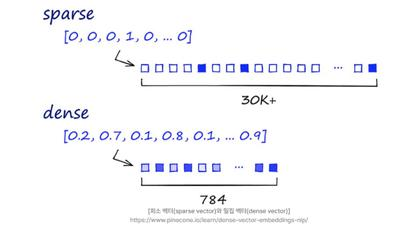

이러한 단점을 극복하기 위해 등장한 것이 바로 다음에 설명할 **단어 임베딩(Word Embedding)**입니다.

## 3. 단어 임베딩 (Word Embedding)


![word embedding](https://cdn.prod.website-files.com/6064b31ff49a2d31e0493af1/66cef3985f923ec769df8eb5_AD_4nXe19mFpOv6IyXTZ-oAlO-P3Y_PwAzQjx664efQUB6MI9ncrgAxXgoVYf_JvODN7ULzKOZNT9xB0leCEVOo4QbM346bnzy2cpY3kflfciiKT4LHn8Olz13aSC8u_VhLfPn2ZMrUtgZEpMZfipHrvLDFedJgk.png)

원-핫 인코딩은 각 단어를 고유하게 표현할 수는 있지만, 단어의 의미나 단어 간의 관계를 전혀 담지 못한다는 한계가 있었습니다. 예를 들어 '고양이'와 '강아지'는 의미적으로 유사하지만, 원-핫 인코딩 상에서는 '고양이'와 '책상'만큼이나 서로 관련 없는 단어로 표현됩니다. 또한, 단어 수가 많아지면 벡터의 차원이 매우 커지는 문제도 있습니다.

**단어 임베딩이란 무엇일까요?**

**단어 임베딩(Word Embedding)**은 이러한 문제를 해결하기 위해 등장한 방법으로, 단어를 고정된 크기의 **밀집 벡터(dense vector)**로 표현하는 것입니다. 이 밀집 벡터는 단어의 의미적인 특징을 벡터 공간에 투영하여, 의미가 비슷한 단어들은 벡터 공간에서 서로 가까운 위치에, 의미가 다른 단어들은 멀리 떨어진 위치에 있도록 표현합니다.

*   **밀집 벡터**: 원-핫 인코딩처럼 대부분이 0인 희소 벡터(sparse vector)와 달리, 대부분의 요소가 실수값을 가지는 벡터입니다.
*   **저차원**: 보통 수십에서 수백 차원의 벡터로 표현되어 원-핫 인코딩보다 훨씬 효율적입니다. (예: 50, 100, 200, 300차원)
*   **의미적 유사도 반영**: "비슷한 문맥에서 등장하는 단어는 비슷한 의미를 가진다"는 분포 가설(distributional hypothesis)에 따라 학습됩니다. 따라서 '왕'-'남자'+'여자'='여왕'과 같은 단어 간의 의미론적, 문법적 관계도 포착할 수 있습니다.

**단어 임베딩의 종류**

단어 임베딩은 크게 두 가지 방식으로 얻을 수 있습니다.

1.  **미리 학습된 임베딩 사용 (Pre-trained Word Embeddings)**: 대규모 말뭉치(corpus)로 미리 학습된 단어 임베딩을 가져와 사용하는 것입니다. Word2Vec, GloVe, FastText 등이 대표적입니다. 특정 작업에 대한 데이터가 적을 때 유용합니다.
2.  **직접 학습 (Learning Embeddings from Scratch)**: 우리가 해결하려는 특정 작업(예: 감성분석, 기계번역)을 위한 신경망 모델을 학습시킬 때, 입력층의 일부로 임베딩 층(Embedding Layer)을 두어 해당 작업에 최적화된 단어 임베딩을 직접 학습하는 방식입니다. 이 장의 다음 예제에서 이 방식을 사용합니다.

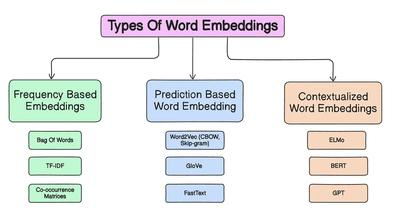


단어 임베딩은 텍스트 데이터를 딥러닝 모델의 입력으로 사용하는 데 있어 매우 중요한 역할을 하며, NLP 분야의 성능 향상에 크게 기여했습니다.

## 4. 텍스트를 읽고 긍정, 부정 예측하기

이제 앞에서 배운 토큰화, 그리고 (간접적으로 사용될) 단어 임베딩의 개념을 활용하여 실제 텍스트 데이터를 이용한 감성 분석(Sentiment Analysis) 예제를 살펴보겠습니다. 감성 분석은 주어진 텍스트가 긍정적인지, 부정적인지, 또는 중립적인지를 판단하는 작업입니다.

여기서는 간단한 영화 리뷰 텍스트를 보고, 해당 리뷰가 긍정적인지 부정적인지를 예측하는 딥러닝 모델을 만들어보겠습니다.

**데이터 준비**

먼저 학습에 사용할 리뷰 데이터와 각 리뷰에 대한 레이블(긍정/부정)을 준비합니다.

In [28]:
# 텍스트 리뷰 자료를 지정합니다.
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
classes = array([1,1,1,1,1,0,0,0,0,0])

10개의 짧은 리뷰가 `docs` 리스트에 저장되어 있고, 각 리뷰가 긍정(1)인지 부정(0)인지에 대한 정보가 `classes` 배열에 저장되어 있습니다. 처음 5개는 긍정, 뒤 5개는 부정 리뷰입니다.

**토큰화 및 정수 인코딩**

텍스트 데이터를 모델에 입력하기 위해 `Tokenizer`를 사용하여 단어 사전을 만들고, 각 리뷰를 정수 시퀀스로 변환합니다.

In [29]:
# 토큰화 
token = Tokenizer()
token.fit_on_texts(docs) # 리뷰 데이터로 단어 사전 생성
print(token.word_index) # 생성된 단어-인덱스 사전 출력

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}


**출력 결과:**

```
{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}
```

총 20개의 고유한 단어가 사전에 등록되었고, 각 단어에 1부터 20까지의 인덱스가 부여되었습니다.

이제 이 사전을 이용해 각 리뷰 텍스트를 정수 시퀀스로 변환합니다.

In [30]:
x = token.texts_to_sequences(docs) # 리뷰 텍스트를 정수 시퀀스로 변환
print("\n리뷰 텍스트, 토큰화 결과:\n",  x)


리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


**출력 결과:**

```

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]
```

각 리뷰가 해당 단어들의 인덱스로 이루어진 리스트로 변환된 것을 볼 수 있습니다. 예를 들어, 첫 번째 리뷰 "너무 재밌네요"는 `[1, 2]`로 변환되었습니다. ('너무'는 인덱스 1, '재밌네요'는 인덱스 2).

**패딩 (Padding)**

딥러닝 모델, 특히 순차적인 데이터를 다루는 RNN이나 Embedding Layer를 사용하는 모델은 일반적으로 입력 데이터의 길이가 동일해야 합니다. 하지만 위에서 변환된 정수 시퀀스들을 보면 각 리뷰의 길이가 다릅니다 (예: `[1, 2]`는 길이 2, `[3]`은 길이 1).

이처럼 서로 다른 길이의 시퀀스를 동일한 길이로 맞춰주기 위해 **패딩(Padding)**을 사용합니다. 패딩은 보통 특정 값(주로 0)을 짧은 시퀀스의 앞이나 뒤에 채워 넣어 길이를 맞추는 작업입니다. 케라스의 `pad_sequences` 함수를 사용합니다.

In [31]:
# 패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
# 가장 긴 시퀀스의 길이에 맞추거나, 사용자가 지정한 최대 길이에 맞춥니다.
# 여기서는 모든 시퀀스의 길이를 4로 통일합니다.
# 길이가 4보다 짧은 시퀀스는 앞부분에 0이 채워집니다 (pre-padding).
# 길이가 4보다 긴 시퀀스는 뒷부분이 잘립니다 (truncating, 이 예제에서는 해당 없음).
padded_x = pad_sequences(x, 4)  
print("\n패딩 결과:\n", padded_x)


패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


**출력 결과:**

```

패딩 결과:
 [[ 0  0  1  2]  # "너무 재밌네요" -> [1, 2] -> pre-padding
 [ 0  0  0  3]  # "최고예요" -> [3] -> pre-padding
 [ 4  5  6  7]  # "참 잘 만든 영화예요" -> [4, 5, 6, 7] (길이 4, 패딩 없음)
 [ 0  8  9 10]  # "추천하고 싶은 영화입니다" -> [8, 9, 10] -> pre-padding
 [ 0 11 12 13]  # "한번 더 보고싶네요" -> [11, 12, 13] -> pre-padding
 [ 0  0  0 14]  # "글쎄요" -> [14] -> pre-padding
 [ 0  0  0 15]  # "별로예요" -> [15] -> pre-padding
 [ 0  0 16 17]  # "생각보다 지루하네요" -> [16, 17] -> pre-padding
 [ 0  0 18 19]  # "연기가 어색해요" -> [18, 19] -> pre-padding
 [ 0  0  0 20]] # "재미없어요" -> [20] -> pre-padding
```

모든 리뷰가 길이 4의 시퀀스로 변환된 것을 볼 수 있습니다. 길이가 4보다 짧았던 리뷰들은 앞쪽에 0이 채워졌습니다. 이제 이 `padded_x`가 모델의 입력으로 사용될 준비가 되었습니다.

**딥러닝 모델 구축**

이제 감성 분석을 위한 딥러닝 모델을 만듭니다. 여기서는 케라스의 `Sequential` API를 사용하여 간단한 모델을 구성합니다. 이 모델은 단어 임베딩 층, Flatten 층, 그리고 최종 예측을 위한 Dense 층으로 이루어집니다.

In [32]:
# 임베딩에 입력될 단어의 수를 지정합니다. (단어 사전 크기 + 1)
# +1은 보통 패딩 값 0을 고려하기 위함입니다.
word_size = len(token.word_index) +1

# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
model = Sequential()
# Embedding Layer: 각 단어를 밀집 벡터로 변환합니다.
#   - word_size: 입력될 총 단어의 종류 수 (어휘 사전의 크기).
#   - 8: 임베딩 벡터의 차원 수. 각 단어가 8차원의 벡터로 표현됩니다.
#   - input_length=4: 입력 시퀀스의 길이. (패딩된 길이와 동일)
model.add(Embedding(word_size, 8, input_length=4)) # 수정: input_length 명시
# model.build((None, 4)) # build를 사용하거나, input_length를 Embedding에 직접 지정할 수 있습니다. input_length가 더 명확합니다.

# Flatten Layer: 임베딩된 다차원 벡터를 1차원 벡터로 펼쳐줍니다.
# (None, 4, 8) -> (None, 32)
model.add(Flatten())

# Dense Layer (Output Layer): 최종적으로 긍정/부정을 예측합니다.
#   - 1: 출력 뉴런 수. 이진 분류(긍정/부정)이므로 1개.
#   - activation='sigmoid': 시그모이드 함수. 출력을 0과 1 사이의 확률 값으로 변환하여 긍정일 확률을 나타냅니다.
model.add(Dense(1, activation='sigmoid'))

model.summary() # 모델의 구조 요약 출력

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**수정된 설명:**
`Embedding` 레이어에 `input_length=4`를 명시적으로 추가했습니다. 이렇게 하면 모델이 입력으로 기대하는 시퀀스의 길이를 명확히 알 수 있습니다. `model.build()`는 첫 데이터가 들어올 때 입력 형태를 추론하거나, 이렇게 명시적으로 빌드할 때 사용될 수 있지만, `Embedding` 레이어에 `input_length`를 지정하는 것이 더 일반적이고 가독성이 좋습니다.

**모델 구조 설명:**

1.  **`Embedding(word_size, 8, input_length=4)`**:
    *   `word_size` (21): 입력될 수 있는 총 단어의 종류(어휘 사전 크기 + 1)입니다.
    *   `8`: 임베딩 벡터의 차원입니다. 즉, 각 단어는 8차원의 밀집 벡터로 표현됩니다. 이 값은 하이퍼파라미터로, 사용자가 조절할 수 있습니다.
    *   `input_length=4`: 입력되는 각 시퀀스의 길이입니다. (패딩된 길이와 동일)
    *   이 레이어는 `(None, 4)` 형태의 정수 시퀀스를 입력받아, 각 정수를 8차원 벡터로 변환하여 `(None, 4, 8)` 형태의 3D 텐서를 출력합니다. 이 과정에서 단어의 의미를 학습하게 됩니다.
    *   학습 파라미터 수: `word_size * 8 = 21 * 8 = 168`개.

2.  **`Flatten()`**:
    *   Embedding 레이어의 출력인 3D 텐서 `(None, 4, 8)`을 2D 텐서 `(None, 32)` (여기서 `32 = 4 * 8`)로 펼쳐줍니다. 이는 뒤따르는 `Dense` 레이어에 입력으로 넣기 위함입니다.
    *   학습 파라미터는 없습니다.

3.  **`Dense(1, activation='sigmoid')`**:
    *   최종 출력을 위한 완전 연결 계층(Fully Connected Layer)입니다.
    *   `1`: 뉴런의 수. 긍정(1) 또는 부정(0)을 예측하는 이진 분류이므로 1개의 뉴런을 가집니다.
    *   `activation='sigmoid'`: 활성화 함수로 시그모이드를 사용합니다. 시그모이드 함수는 입력값을 0과 1 사이의 값으로 변환해주므로, 이 출력은 해당 리뷰가 긍정일 확률을 나타냅니다.
    *   학습 파라미터 수: `(입력 뉴런 수 * 출력 뉴런 수) + 출력 뉴런 수의 편향 = (32 * 1) + 1 = 33`개.

**출력 결과 (model.summary()):**

<div class="output_html">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold">Model: "sequential"</span>
</pre>
</div>
<div class="output_html">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace">┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃<span style="font-weight: bold"> Layer (type)                    </span>┃<span style="font-weight: bold"> Output Shape           </span>┃<span style="font-weight: bold">       Param # </span>┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (<span style="color: #0087ff; text-decoration-color: #0087ff">Embedding</span>)           │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">4</span>, <span style="color: #00af00; text-decoration-color: #00af00">8</span>)           │           <span style="color: #00af00; text-decoration-color: #00af00">168</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (<span style="color: #0087ff; text-decoration-color: #0087ff">Flatten</span>)               │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">32</span>)             │             <span style="color: #00af00; text-decoration-color: #00af00">0</span> │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (<span style="color: #0087ff; text-decoration-color: #0087ff">Dense</span>)                   │ (<span style="color: #00d7ff; text-decoration-color: #00d7ff">None</span>, <span style="color: #00af00; text-decoration-color: #00af00">1</span>)              │            <span style="color: #00af00; text-decoration-color: #00af00">33</span> │
└─────────────────────────────────┴────────────────────────┴───────────────┘
</pre>
</div>
<div class="output_html">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Total params: </span><span style="color: #00af00; text-decoration-color: #00af00">201</span> (804.00 B)
</pre>
</div>
<div class="output_html">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">201</span> (804.00 B)
</pre>
</div>
<div class="output_html">
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="font-weight: bold"> Non-trainable params: </span><span style="color: #00af00; text-decoration-color: #00af00">0</span> (0.00 B)
</pre>
</div>

**모델 컴파일 및 학습**

모델 구조를 정의한 후에는 학습 과정을 설정하는 **컴파일(compile)** 단계를 거칩니다. 여기서는 옵티마이저, 손실 함수, 평가 지표를 지정합니다.

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# optimizer: 모델을 어떻게 업데이트할지 결정합니다. 'adam'은 일반적으로 좋은 성능을 보이는 옵티마이저입니다.
# loss: 손실 함수. 모델의 예측이 실제 값과 얼마나 다른지를 측정합니다.
#       'binary_crossentropy'는 이진 분류 문제(결과가 0 또는 1)에 사용되는 손실 함수입니다.
# metrics: 학습 과정을 모니터링할 평가 지표입니다. 'accuracy'(정확도)는 전체 예측 중 올바르게 예측한 비율을 나타냅니다.

# 모델 학습
# padded_x: 입력 데이터 (패딩된 리뷰 시퀀스)
# classes: 정답 레이블 (긍정/부정)
# epochs=20: 전체 학습 데이터를 20번 반복하여 학습합니다. (에포크)
model.fit(padded_x, classes, epochs=20)

# 모델 평가
# 학습이 완료된 모델에 대해 학습 데이터를 사용하여 정확도를 평가합니다.
# model.evaluate()는 [손실 값, 정확도]를 반환합니다.
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.6000 - loss: 0.6907
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7000 - loss: 0.6883
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7000 - loss: 0.6860
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8000 - loss: 0.6836
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8000 - loss: 0.6813
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8000 - loss: 0.6790
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8000 - loss: 0.6767
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8000 - loss: 0.6744
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8000 - loss: 0.6721
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8000 - loss: 0.6698
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8000 - loss: 0.6675
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8000 - loss: 0.6652


**학습 과정 설명:**

*   **`model.compile(...)`**:
    *   `optimizer='adam'`: Adam 옵티마이저를 사용합니다. Adam은 학습률을 동적으로 조절하여 효율적인 학습을 돕는 알고리즘입니다.
    *   `loss='binary_crossentropy'`: 손실 함수로 이진 크로스엔트로피를 사용합니다. 이는 시그모이드 활성화 함수를 통해 나온 예측 확률과 실제 레이블(0 또는 1) 간의 차이를 계산하여 모델의 오류를 측정합니다.
    *   `metrics=['accuracy']`: 훈련 및 테스트 과정에서 모델의 성능을 '정확도'로 평가합니다.
*   **`model.fit(padded_x, classes, epochs=20)`**:
    *   `padded_x`: 준비된 입력 데이터입니다.
    *   `classes`: 해당 입력 데이터의 정답 레이블입니다.
    *   `epochs=20`: 전체 데이터셋을 총 20번 반복하여 학습합니다. 한 번의 에포크는 전체 학습 데이터를 사용하여 모델의 가중치를 한 번 업데이트하는 과정을 의미합니다. 학습 과정에서 각 에포크마다 손실 값과 정확도가 출력되어 모델이 어떻게 개선되는지 확인할 수 있습니다.
*   **`model.evaluate(padded_x, classes)`**:
    *   학습이 완료된 후, 모델의 최종 성능을 평가합니다. 여기서는 학습에 사용했던 데이터를 그대로 사용하여 평가하고 있습니다. (실제로는 과적합을 방지하기 위해 학습 데이터와 별도의 테스트 데이터로 평가하는 것이 일반적입니다.)
    *   `[1]`을 통해 정확도 값만 추출하여 출력합니다.

**출력 결과:**

```
Epoch 1/20
 [1m1/1 [0m  [32m━━━━━━━━━━━━━━━━━━━━ [0m [37m [0m  [1m1s [0m 560ms/step - accuracy: 0.6000 - loss: 0.6906
Epoch 2/20
 [1m1/1 [0m  [32m━━━━━━━━━━━━━━━━━━━━ [0m [37m [0m  [1m0s [0m 38ms/step - accuracy: 0.7000 - loss: 0.6883
Epoch 3/20
 [1m1/1 [0m  [32m━━━━━━━━━━━━━━━━━━━━ [0m [37m [0m  [1m0s [0m 40ms/step - accuracy: 0.8000 - loss: 0.6860
... (중략) ...
Epoch 19/20
 [1m1/1 [0m  [32m━━━━━━━━━━━━━━━━━━━━ [0m [37m [0m  [1m0s [0m 44ms/step - accuracy: 1.0000 - loss: 0.6494
Epoch 20/20
 [1m1/1 [0m  [32m━━━━━━━━━━━━━━━━━━━━ [0m [37m [0m  [1m0s [0m 45ms/step - accuracy: 0.9000 - loss: 0.6471
 [1m1/1 [0m  [32m━━━━━━━━━━━━━━━━━━━━ [0m [37m [0m  [1m0s [0m 140ms/step - accuracy: 0.9000 - loss: 0.6447

 Accuracy: 0.9000
```

출력 결과를 보면, 에포크가 진행됨에 따라 손실(loss)은 점차 줄어들고 정확도(accuracy)는 점차 증가하는 경향을 보입니다. 마지막 에포크(Epoch 20/20)에서 학습 데이터에 대한 정확도가 0.9000 (90%)에 도달한 것을 확인할 수 있습니다.

매우 적은 양의 데이터(10개 리뷰)를 사용했음에도 불구하고, 모델은 이 데이터 내에서 긍정과 부정을 구분하는 패턴을 어느 정도 학습했습니다. 더 많은, 그리고 다양한 데이터를 사용한다면 모델의 일반화 성능이 더욱 향상될 것입니다.

이것으로 딥러닝을 이용한 자연어 처리의 기본적인 파이프라인, 즉 텍스트 전처리(토큰화, 정수 인코딩, 패딩)부터 모델 구축, 학습, 평가까지의 과정을 모두 살펴보았습니다. 이 예제는 간단하지만, 더 복잡한 NLP 문제 해결을 위한 기초가 될 것입니다.